#### candlestick01.ipynb - this notebook creates the candlestick plot for 5 days monday - friday of the week. and saves to file. This will be later fed to Convolution Neural Network so it can learn to recognize the patterns based on Candlestick image for a week.
#### The idea is we also feed a signal BUY/SELL which is based on next Monday Closing price. If the Monday closing price is higher than the prior friday closing price then its a BUY and if not its a SELL.
#### Our attempt here is to see if the Convolution Neural network can learn the image and predict the signal.

#### We see later that this Signal is not enough of an true indicator of a Buy/Sell so the Neural network results are not that great. Ideally if there was better correlation between image and signal we would have give the Neural network to learn and predict in better way.

##### Switch off warnings

In [1]:
import warnings
warnings.filterwarnings('ignore')

##### Import necessary libraries, packages

In [45]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import mplfinance as mpf
import matplotlib.dates as mpl_dates
from datetime import date, timedelta
import calendar
from datetime import datetime

##### Chuck - this library will be used for plotting the candlestick

In [3]:
from mplfinance.original_flavor import candlestick_ohlc

### Data Loading

In this activity, we will use closing prices of Apple stock to make predictions of future closing prices. 
We will use yfinance - Yahoo! Finance market data downloader to get the historical market data

In [4]:
#set ticker
appl=yf.Ticker("AAPL")

In [5]:
# get stock info
appl.info

# get historical market data
hist = appl.history(period="max")

#### Gett AAPL stock for 1 year for now. Also start from Monday. 
#### We choose 1 year since we will later also get New Sentiment and other trading indicators to combine. But the News Sentiment data we had hard time to get historical data. So we wanted to keep the period consistent so we can add inputs equally for predictions.
##### Note- Holiday will NOT trade. So that week the candle will have less candles for the week as holiday day there is no trading

In [6]:
#download data
data = yf.download("AAPL",
                   start="2020-07-06", 
                   end="2021-07-09",
                   period = "1d"
                  )

data_test = yf.download("AAPL",
                   start="2021-07-12", 
                   end="2021-07-30",
                   period = "1d"
                  )

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


##### Print some samples to check the data is correctly retrieved

In [7]:
data.head(12)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-06,92.500000,93.945000,92.467499,93.462502,92.698074,118655600
2020-07-07,93.852501,94.654999,93.057503,93.172501,92.410439,112424400
2020-07-08,94.180000,95.375000,94.089996,95.342499,94.562691,117092000
2020-07-09,96.262497,96.317497,94.672501,95.752502,94.969345,125642800
2020-07-10,95.334999,95.980003,94.705002,95.919998,95.135475,90257200
2020-07-13,97.264999,99.955002,95.257500,95.477501,94.696594,191649200
2020-07-14,94.839996,97.254997,93.877502,97.057503,96.263672,170989200
2020-07-15,98.989998,99.247498,96.489998,97.724998,96.925705,153198000
2020-07-16,96.562500,97.404999,95.904999,96.522499,95.733040,110577600


In [8]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-01,136.600006,137.330002,135.759995,137.270004,137.064651,52485800
2021-07-02,137.899994,140.000000,137.750000,139.960007,139.750626,78852600
2021-07-06,140.070007,143.149994,140.070007,142.020004,141.807541,108181800
2021-07-07,143.539993,144.889999,142.660004,144.570007,144.353729,104911600
2021-07-08,141.580002,144.059998,140.669998,143.240005,143.025711,105575500


In [9]:
data_test.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-12,146.210007,146.320007,144.000000,144.500000,144.283829,76299700
2021-07-13,144.029999,147.460007,143.630005,145.639999,145.422119,100827100
2021-07-14,148.100006,149.570007,147.679993,149.149994,148.926865,127050800
2021-07-15,149.240005,150.000000,147.089996,148.479996,148.257874,106820300
2021-07-16,148.460007,149.759995,145.880005,146.389999,146.170990,93251400


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 255 entries, 2020-07-06 to 2021-07-08
Data columns (total 6 columns):
Open         255 non-null float64
High         255 non-null float64
Low          255 non-null float64
Close        255 non-null float64
Adj Close    255 non-null float64
Volume       255 non-null int64
dtypes: float64(5), int64(1)
memory usage: 13.9 KB


#### Research some sample plotting images

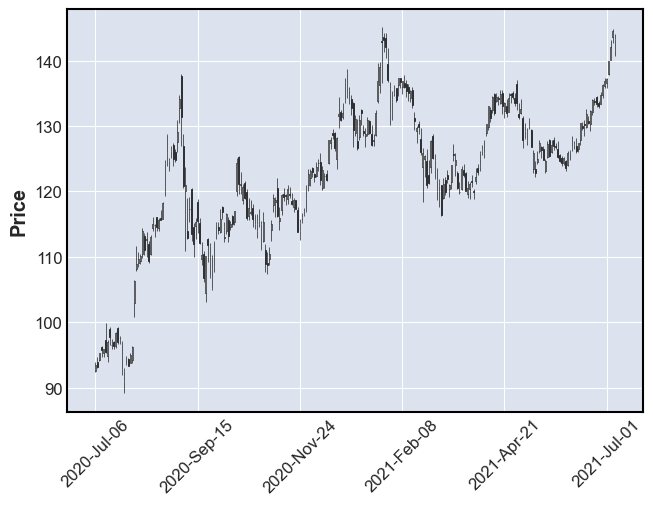

In [11]:
#mpl finance to read the dataframe
mpf.plot(data,type='candle')

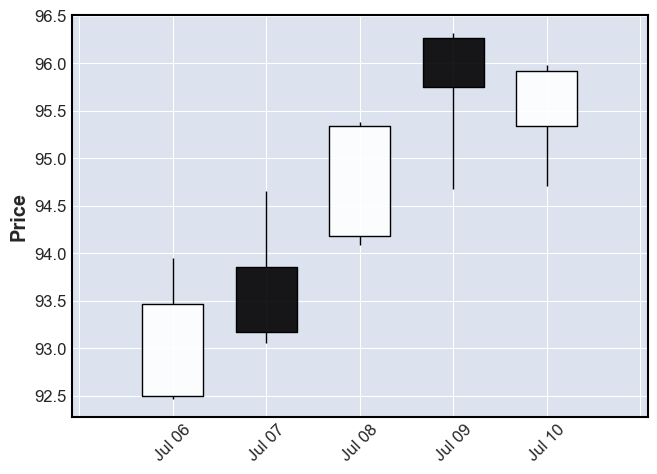

In [12]:
#plot slices
mpf.plot(data.iloc[0:5],type='candle')

In [13]:
data.iloc[0:10]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-06,92.500000,93.945000,92.467499,93.462502,92.698074,118655600
2020-07-07,93.852501,94.654999,93.057503,93.172501,92.410439,112424400
2020-07-08,94.180000,95.375000,94.089996,95.342499,94.562691,117092000
2020-07-09,96.262497,96.317497,94.672501,95.752502,94.969345,125642800
2020-07-10,95.334999,95.980003,94.705002,95.919998,95.135475,90257200
2020-07-13,97.264999,99.955002,95.257500,95.477501,94.696594,191649200
2020-07-14,94.839996,97.254997,93.877502,97.057503,96.263672,170989200
2020-07-15,98.989998,99.247498,96.489998,97.724998,96.925705,153198000
2020-07-16,96.562500,97.404999,95.904999,96.522499,95.733040,110577600


In [14]:
type(data.iloc[0:5])

pandas.core.frame.DataFrame

#### We realize that we cannot have the X and Y axis values in the candlestick images because even they are small we dont want that to interfere in Neural network learning later

#### We need to print the week candles w/o the price and dates. we dont want machine to read that

In [15]:
#mpf.plot(data.loc[0:5, ['Date', 'Open', 'High', 'Low', 'Close']],type='candle')
ohlc = data.iloc[0:5]

In [16]:
ohlc.reset_index(inplace=True)

In [17]:
ohlc['Date'] = pd.to_datetime(ohlc['Date'])
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)

#### Also test viewing the plot and saving the 5 day Candle stick pattern as a file. We just do a test before generating for a whole year

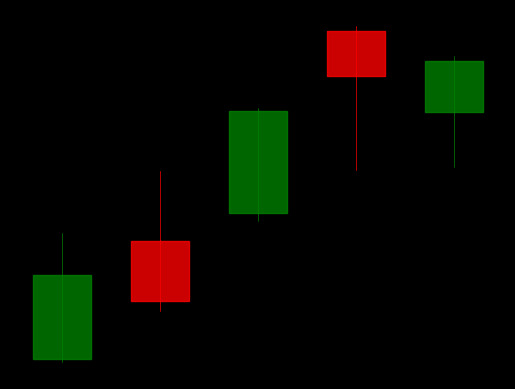

In [18]:
# Creating Subplots
fig, ax = plt.subplots()
plt.axis('off')
fig.patch.set_facecolor('black')

candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)
plt.savefig('red_green.png')
plt.show()


#### We need to use common index across different elements of input fro Deep learnign/ML. So since we are using 1 week data we will just use the Sunday of the ending week as INDEX. So this way other News sentiment, trading indicators like Volume, RSI or SMA20/SMA50 etc can also bring in data for the week and we have it indexed by the Sunday so we can easily concatenate them

#### From the Stock data read - build the Sunday Index List for Training data
##### Also validate holiday weeks that list is built correctly
##### Note - later realized we could just used df.resample but ended up writing code for it.

In [19]:
#s = pd.date_range('2016-12-31', '2017-01-08', freq='D').to_series()
#s.dt.dayofweek
# EndDate = date.today() + timedelta(days=10)
cnt=1
sunday_list= []
week_started = 0
for index, row in data.iterrows():
#    if index.dt.dayofweek == 1:
#        week_started=1
        #print(index, ' Monday')
    if calendar.day_name[index.weekday()] == 'Monday':
        print(calendar.day_name[index.weekday()], index)
        week_started=1
        # calculate the Sunday
        sunday = index + timedelta(days=6)
        sunday_list.append(sunday)
        print('Sunday - ', sunday)
    elif calendar.day_name[index.weekday()] == 'Tuesday':
        if week_started==1:
            week_started=0
        else:
            week_start=1
            print(calendar.day_name[index.weekday()], index)
            sunday = index + timedelta(days=5)
            sunday_list.append(sunday)
            print('Sunday - ', sunday)
#    else:
#        if week_started == 1:
#            week_started=0
#        sunday_list.append(index+2)
    

Monday 2020-07-06 00:00:00
Sunday -  2020-07-12 00:00:00
Monday 2020-07-13 00:00:00
Sunday -  2020-07-19 00:00:00
Monday 2020-07-20 00:00:00
Sunday -  2020-07-26 00:00:00
Monday 2020-07-27 00:00:00
Sunday -  2020-08-02 00:00:00
Monday 2020-08-03 00:00:00
Sunday -  2020-08-09 00:00:00
Monday 2020-08-10 00:00:00
Sunday -  2020-08-16 00:00:00
Monday 2020-08-17 00:00:00
Sunday -  2020-08-23 00:00:00
Monday 2020-08-24 00:00:00
Sunday -  2020-08-30 00:00:00
Monday 2020-08-31 00:00:00
Sunday -  2020-09-06 00:00:00
Tuesday 2020-09-08 00:00:00
Sunday -  2020-09-13 00:00:00
Monday 2020-09-14 00:00:00
Sunday -  2020-09-20 00:00:00
Monday 2020-09-21 00:00:00
Sunday -  2020-09-27 00:00:00
Monday 2020-09-28 00:00:00
Sunday -  2020-10-04 00:00:00
Monday 2020-10-05 00:00:00
Sunday -  2020-10-11 00:00:00
Monday 2020-10-12 00:00:00
Sunday -  2020-10-18 00:00:00
Monday 2020-10-19 00:00:00
Sunday -  2020-10-25 00:00:00
Monday 2020-10-26 00:00:00
Sunday -  2020-11-01 00:00:00
Monday 2020-11-02 00:00:00
Sun

#### Build the Sunday index List for Testing data

In [20]:
#s = pd.date_range('2016-12-31', '2017-01-08', freq='D').to_series()
#s.dt.dayofweek
# EndDate = date.today() + timedelta(days=10)
cnt=1
sunday_test_list= []
week_started = 0
for index, row in data_test.iterrows():
#    if index.dt.dayofweek == 1:
#        week_started=1
        #print(index, ' Monday')
    if calendar.day_name[index.weekday()] == 'Monday':
        #print(calendar.day_name[index.weekday()], index)
        week_started=1
        # calculate the Sunday
        sunday = index + timedelta(days=6)
        sunday_test_list.append(sunday)
        #print('Sunday - ', sunday)
    elif calendar.day_name[index.weekday()] == 'Tuesday':
        if week_started==1:
            week_started=0
        else:
            week_start=1
            print(calendar.day_name[index.weekday()], index)
            sunday = index + timedelta(days=5)
            sunday_test_list.append(sunday)
            #print('Sunday - ', sunday)

##### Print the Sunday list to validate

In [21]:
sunday_list

[Timestamp('2020-07-12 00:00:00'),
 Timestamp('2020-07-19 00:00:00'),
 Timestamp('2020-07-26 00:00:00'),
 Timestamp('2020-08-02 00:00:00'),
 Timestamp('2020-08-09 00:00:00'),
 Timestamp('2020-08-16 00:00:00'),
 Timestamp('2020-08-23 00:00:00'),
 Timestamp('2020-08-30 00:00:00'),
 Timestamp('2020-09-06 00:00:00'),
 Timestamp('2020-09-13 00:00:00'),
 Timestamp('2020-09-20 00:00:00'),
 Timestamp('2020-09-27 00:00:00'),
 Timestamp('2020-10-04 00:00:00'),
 Timestamp('2020-10-11 00:00:00'),
 Timestamp('2020-10-18 00:00:00'),
 Timestamp('2020-10-25 00:00:00'),
 Timestamp('2020-11-01 00:00:00'),
 Timestamp('2020-11-08 00:00:00'),
 Timestamp('2020-11-15 00:00:00'),
 Timestamp('2020-11-22 00:00:00'),
 Timestamp('2020-11-29 00:00:00'),
 Timestamp('2020-12-06 00:00:00'),
 Timestamp('2020-12-13 00:00:00'),
 Timestamp('2020-12-20 00:00:00'),
 Timestamp('2020-12-27 00:00:00'),
 Timestamp('2021-01-03 00:00:00'),
 Timestamp('2021-01-10 00:00:00'),
 Timestamp('2021-01-17 00:00:00'),
 Timestamp('2021-01-

In [22]:
sunday_test_list

[Timestamp('2021-07-18 00:00:00'),
 Timestamp('2021-07-25 00:00:00'),
 Timestamp('2021-08-01 00:00:00')]

##### Slice the data - part of breaking down code and testing individual parts before building the whole thing together

In [23]:
data['2021-06-28':'2021-07-04']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-28,133.410004,135.250000,133.350006,134.779999,134.578369,62111300
2021-06-29,134.800003,136.490005,134.350006,136.330002,136.126053,64556100
2021-06-30,136.169998,137.410004,135.869995,136.960007,136.755112,63261400
2021-07-01,136.600006,137.330002,135.759995,137.270004,137.064651,52485800
2021-07-02,137.899994,140.000000,137.750000,139.960007,139.750626,78852600


In [24]:
type(data['2021-06-28':'2021-07-04'])

pandas.core.frame.DataFrame

In [25]:
len(sunday_list)

53

#### Loop throught all Sunday in the Stock data and take the weeks slice and create the candlestick pattern for the week w/o any Time (X) and price (Y) values. Also save the plot images with Sunday date as filename into buy and sell folder. So later we use Convolution Neural network Keras tool that will use the directories as target.
##### We will create the Buy images in candlesticks/buy folder and Sell images in candlesticks/sell folders. Also the filename will have the Sunday date stamped to know which candlestick week that is.
##### We will create a signal list for each week we know whether its BUY = 1 or SELL = 0

2020-07-05 2020-07-12 00:00:00 2020-07-19
2020-07-12 2020-07-19 00:00:00 2020-07-26
2020-07-19 2020-07-26 00:00:00 2020-08-02
2020-07-26 2020-08-02 00:00:00 2020-08-09
2020-08-02 2020-08-09 00:00:00 2020-08-16
2020-08-09 2020-08-16 00:00:00 2020-08-23
2020-08-16 2020-08-23 00:00:00 2020-08-30
2020-08-23 2020-08-30 00:00:00 2020-09-06
2020-08-30 2020-09-06 00:00:00 2020-09-13
2020-09-06 2020-09-13 00:00:00 2020-09-20
2020-09-13 2020-09-20 00:00:00 2020-09-27
2020-09-20 2020-09-27 00:00:00 2020-10-04
2020-09-27 2020-10-04 00:00:00 2020-10-11
2020-10-04 2020-10-11 00:00:00 2020-10-18
2020-10-11 2020-10-18 00:00:00 2020-10-25
2020-10-18 2020-10-25 00:00:00 2020-11-01
2020-10-25 2020-11-01 00:00:00 2020-11-08
2020-11-01 2020-11-08 00:00:00 2020-11-15
2020-11-08 2020-11-15 00:00:00 2020-11-22
2020-11-15 2020-11-22 00:00:00 2020-11-29
2020-11-22 2020-11-29 00:00:00 2020-12-06
2020-11-29 2020-12-06 00:00:00 2020-12-13
2020-12-06 2020-12-13 00:00:00 2020-12-20
2020-12-13 2020-12-20 00:00:00 202

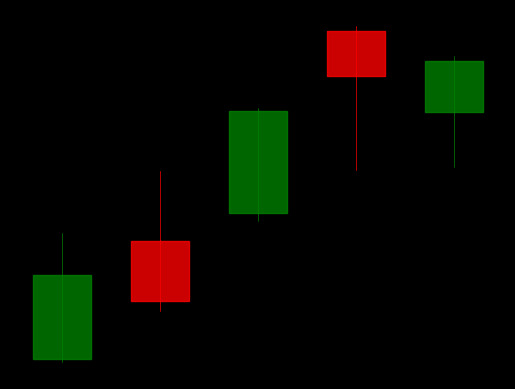

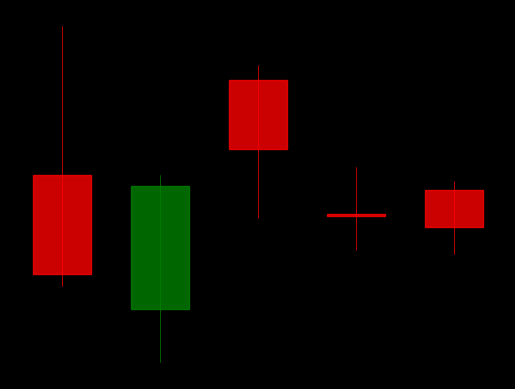

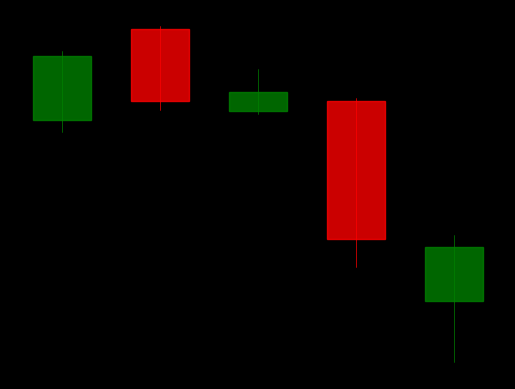

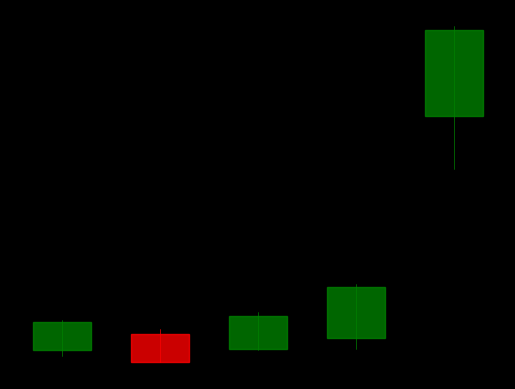

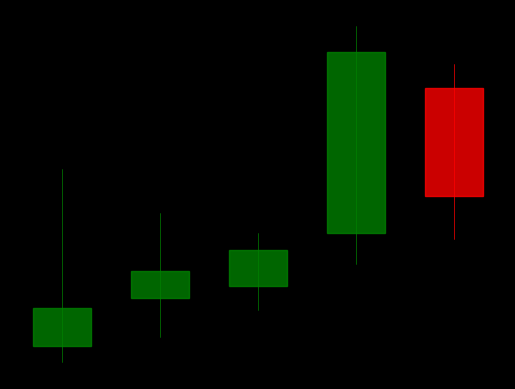

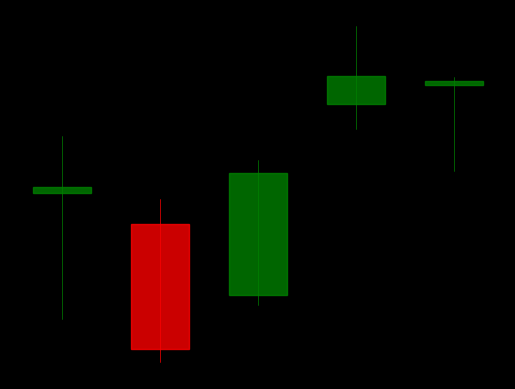

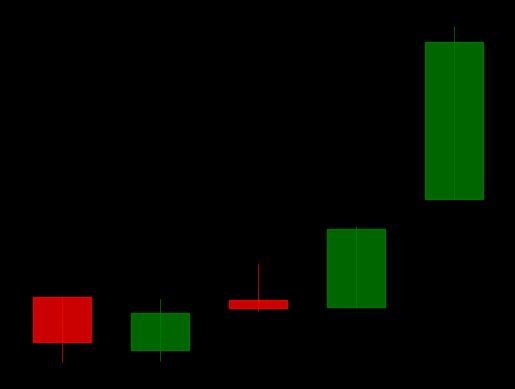

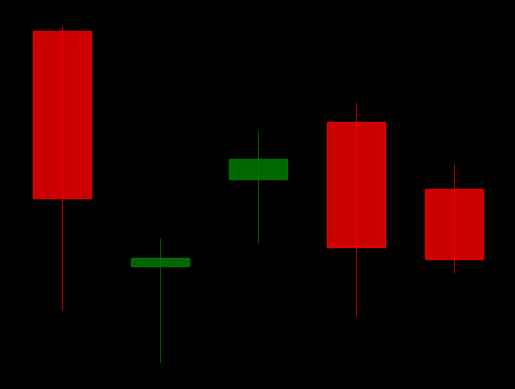

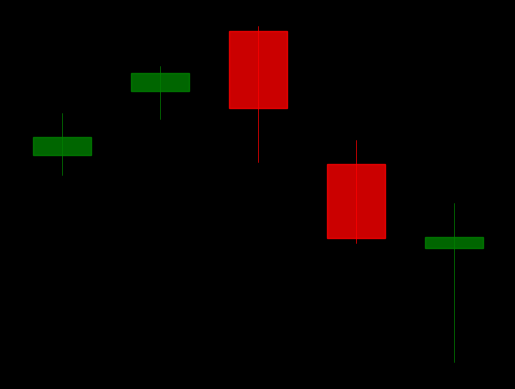

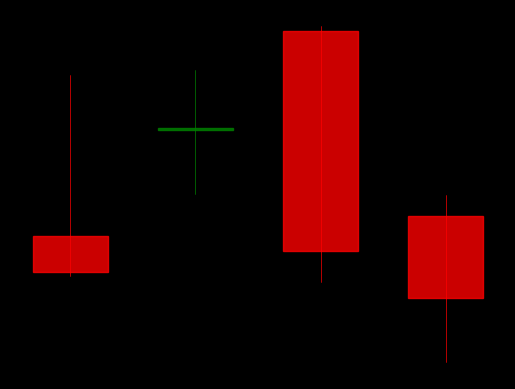

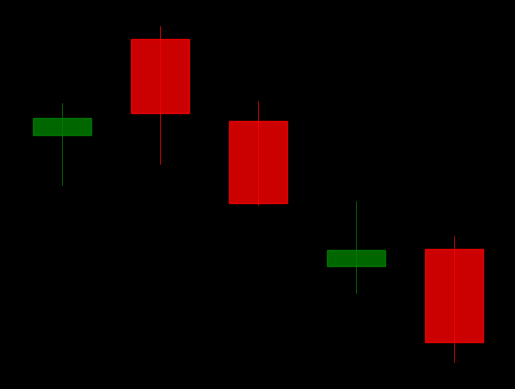

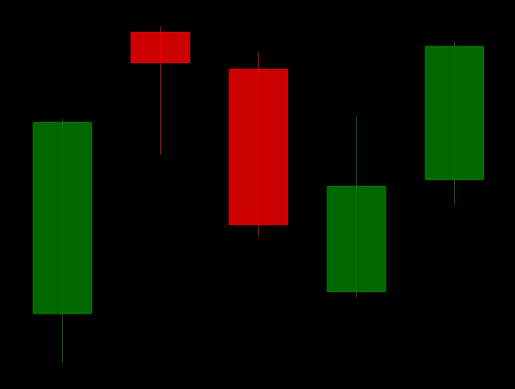

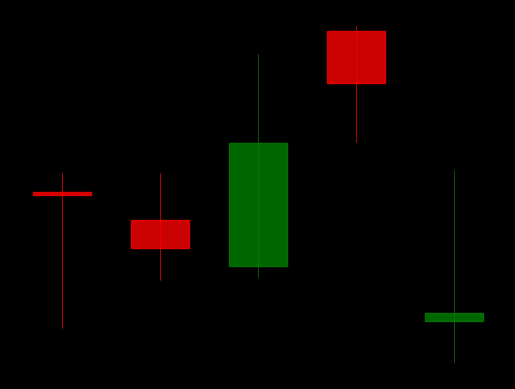

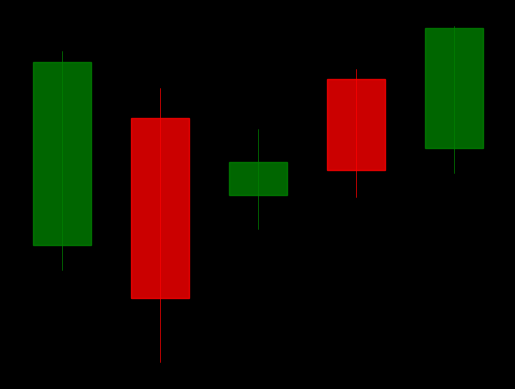

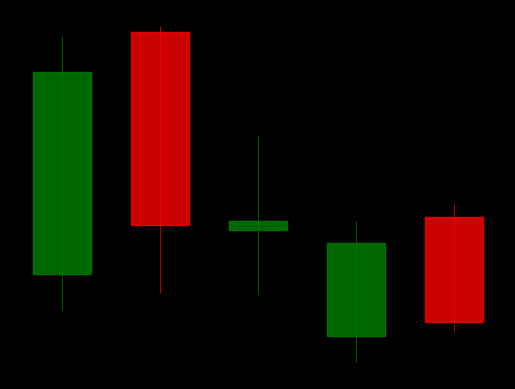

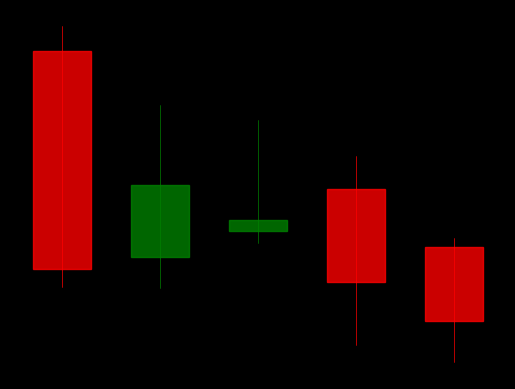

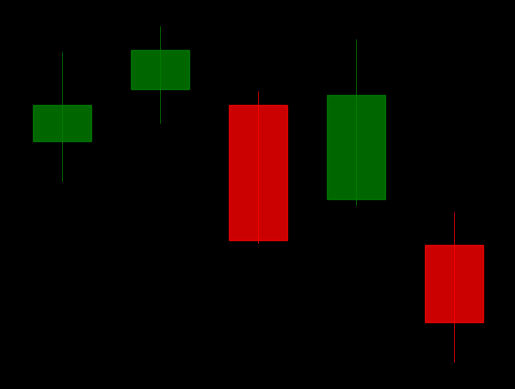

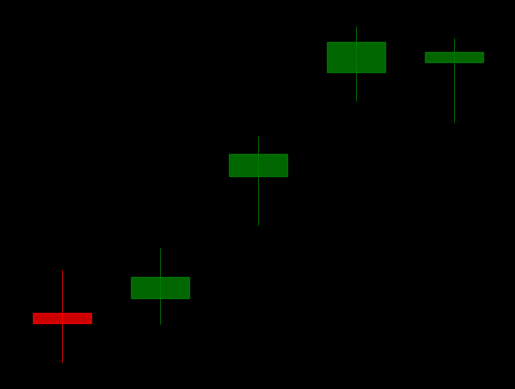

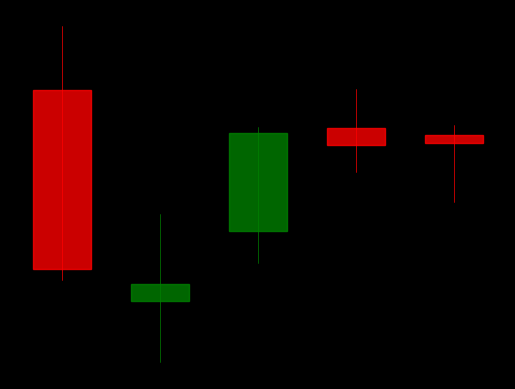

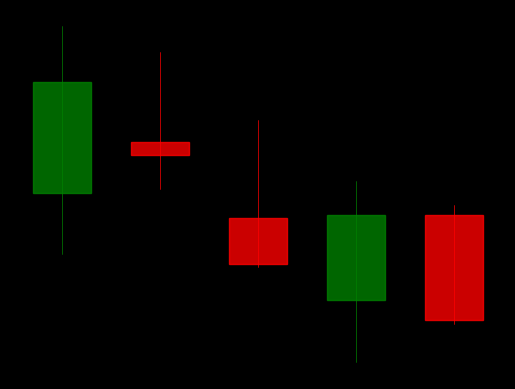

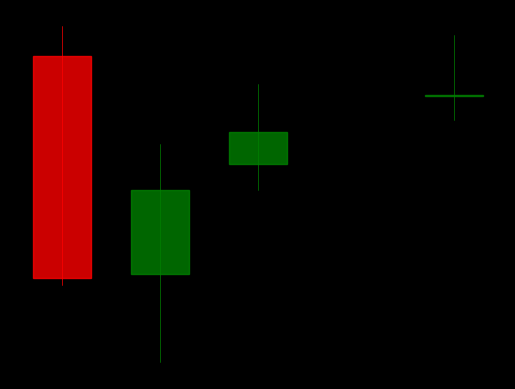

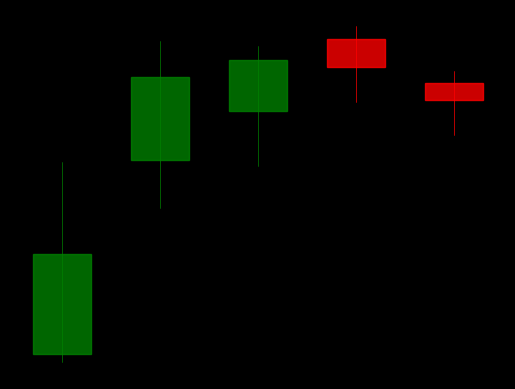

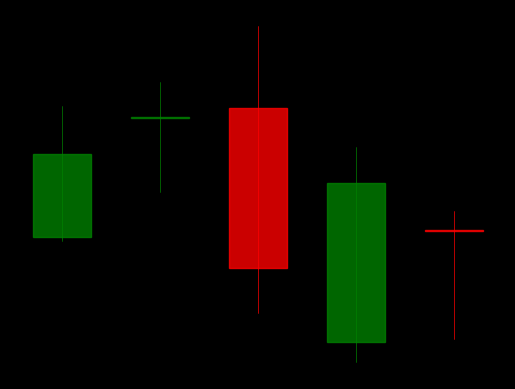

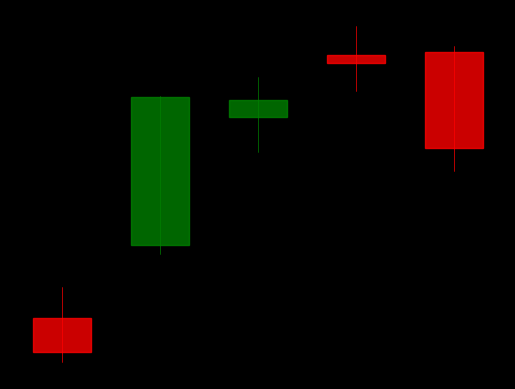

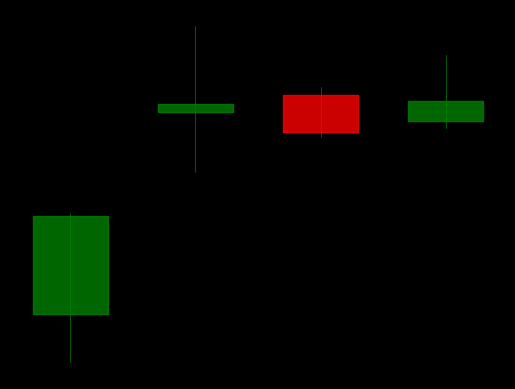

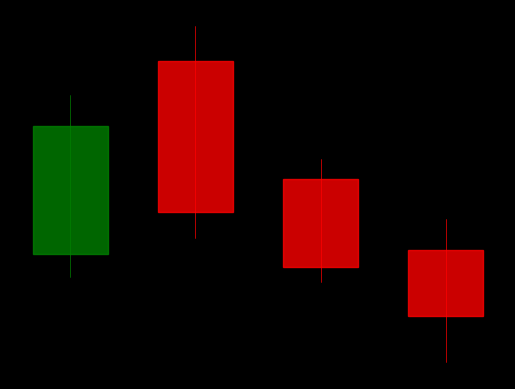

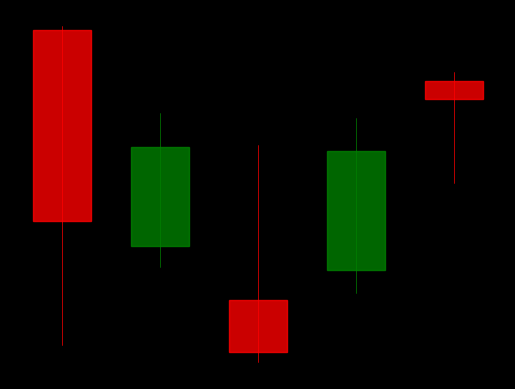

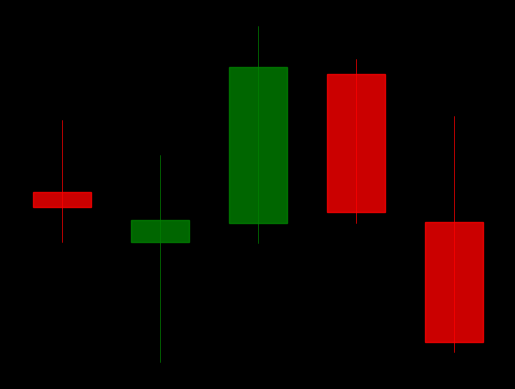

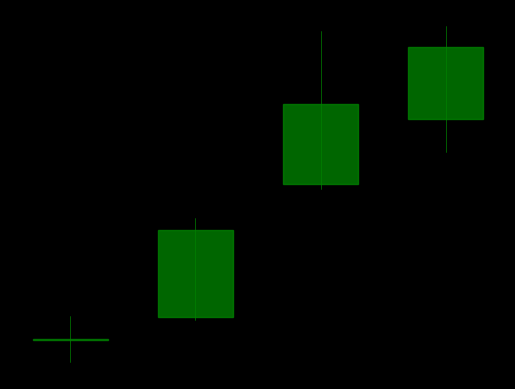

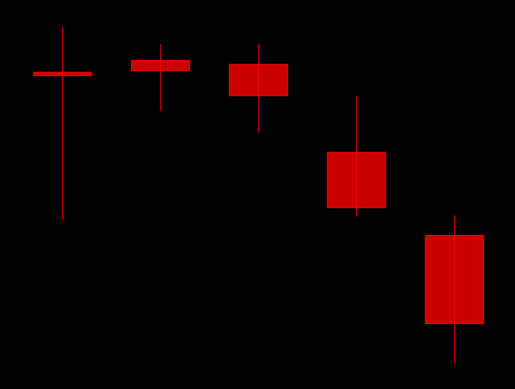

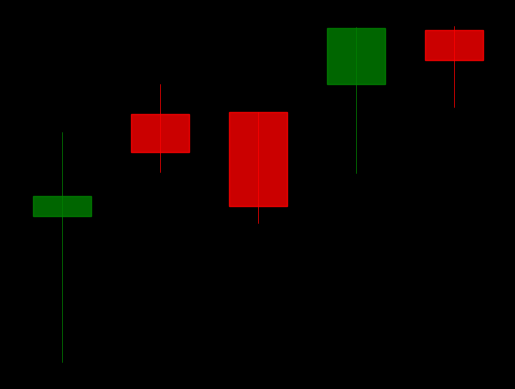

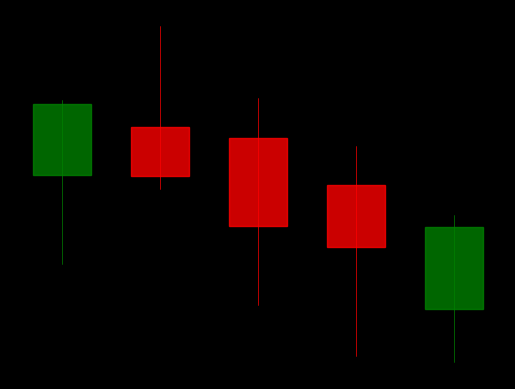

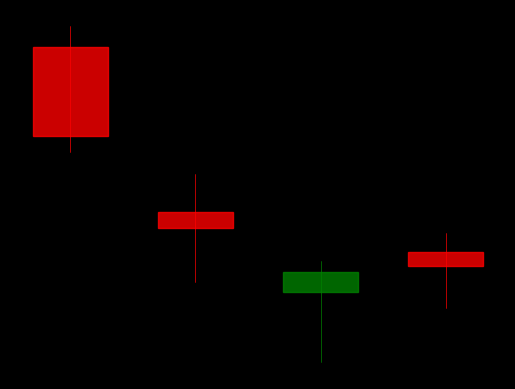

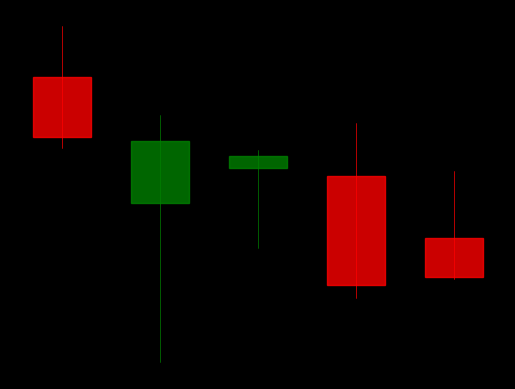

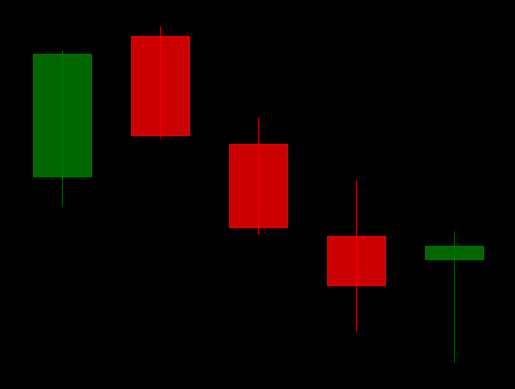

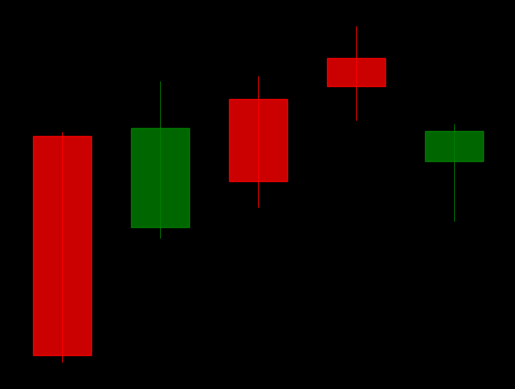

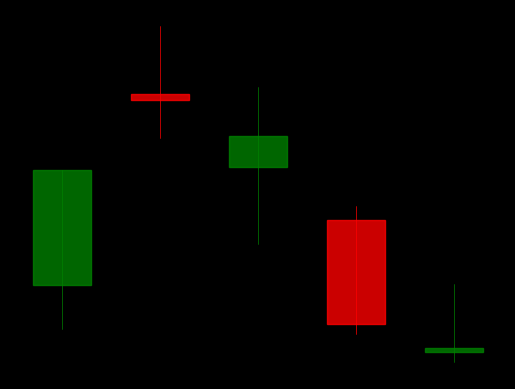

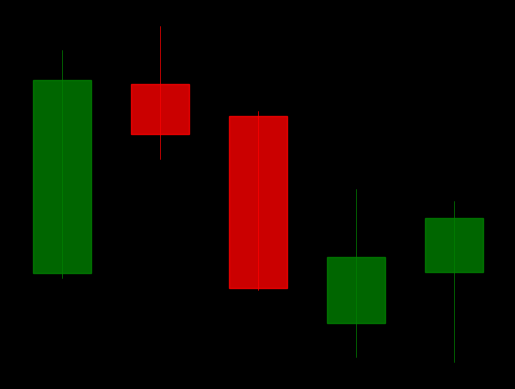

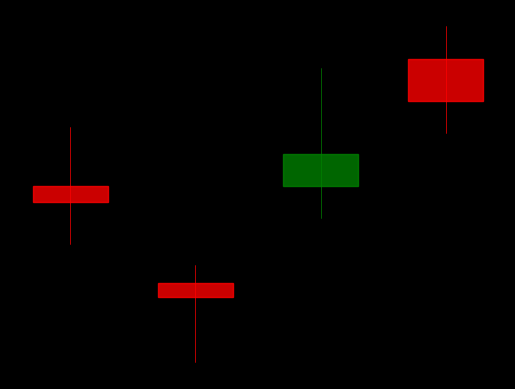

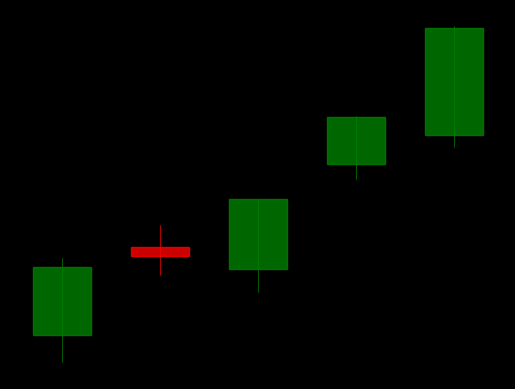

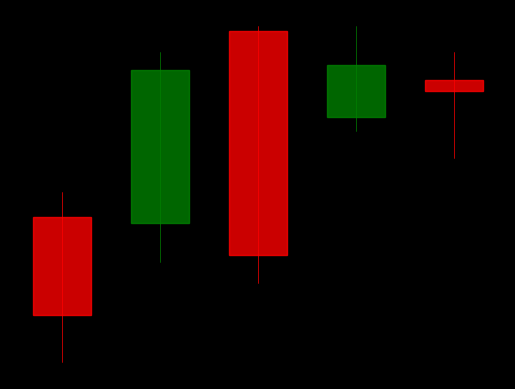

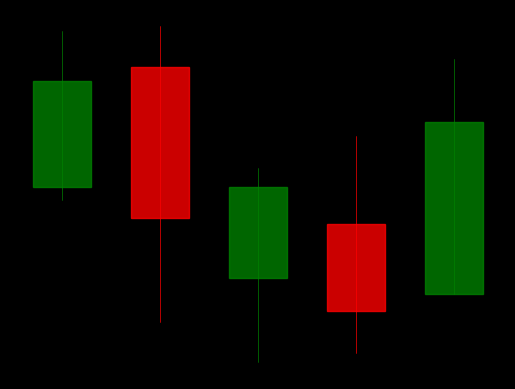

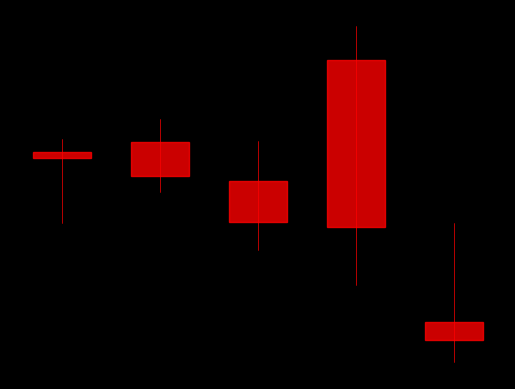

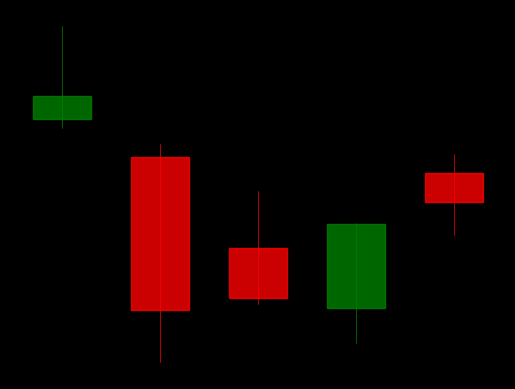

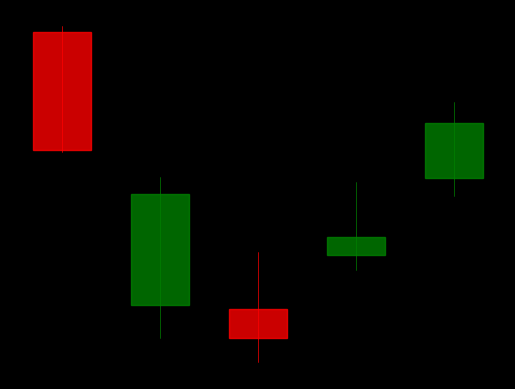

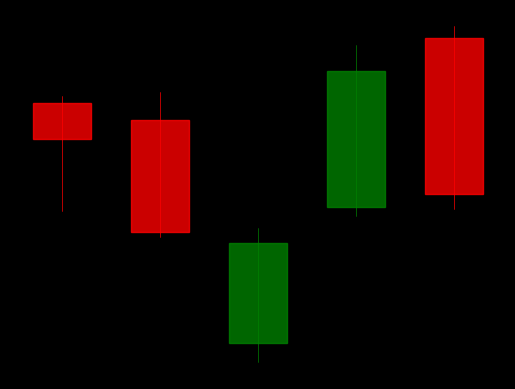

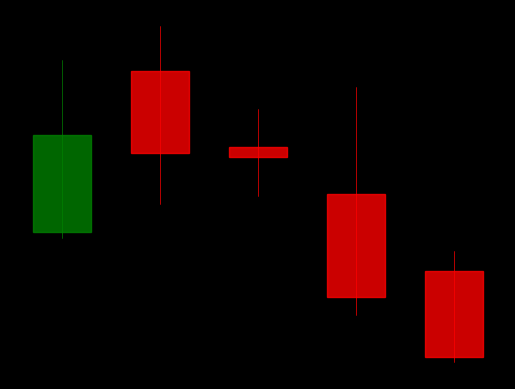

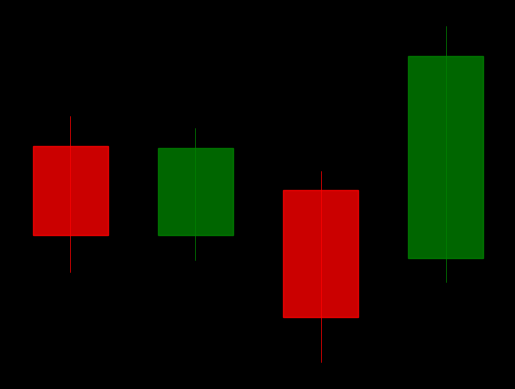

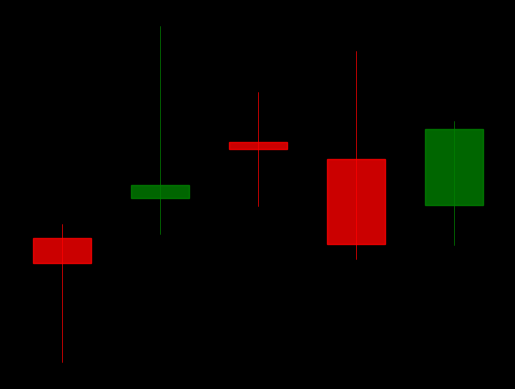

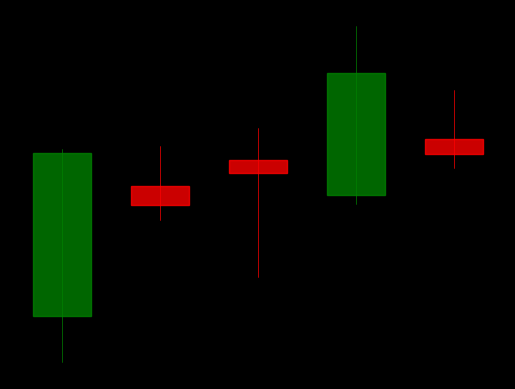

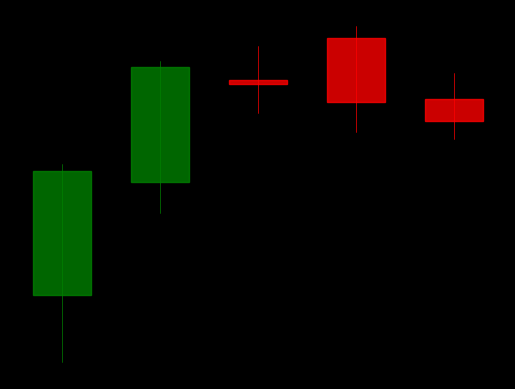

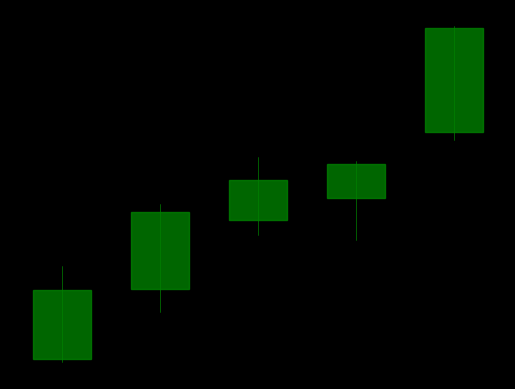

In [26]:
#name = '2015-'
images_created_train = 0
signal_list = []
for x in sunday_list:
    from_date = x - timedelta(days=7)
    from_date1 = from_date.date()              # strip the time
    next_weekending = x + timedelta(days=7)    # Next sunday
    next_weekending1 = next_weekending.date()  # Strip the time
    print(from_date1, x, next_weekending1)
#    print(from_date,x)
#    if x == datetime.strptime('2020-07-12' , '%Y-%m-%d'):
#        print(x)
#        print(data[from_date1:x].head())
#        print('Fri and monday below')

##  Create Signal - take prior week last date price and take next week 1st day price and compare
    week_close = data[from_date1:x].tail(1)['Close']
    #print(type(week_close))
    week_close_price = week_close[0]
    #print(week_close_price)
    nextday_close = data[x:next_weekending1].head(1)['Close']
    try:
        nextday_close_price = nextday_close[0]
    except:
        break
    #print(nextday_close)
    if nextday_close_price > week_close_price:
        signal = 1
    else:
        signal = 0
    signal_list.append(signal)
    #print('Signal = ', signal)
    x1 = x.date()
    #print(from_date1, x1)
    ohlc = data[from_date1: x1]
    ohlc.reset_index(inplace=True)
    ohlc['Date'] = pd.to_datetime(ohlc['Date'])
    ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
    ohlc = ohlc.astype(float)
#    print(ohlc.head())
    # Creating Subplots
    fig, ax = plt.subplots()
    plt.axis('off')
    fig.patch.set_facecolor('black')

    candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)
    images_created_train = images_created_train + 1
    if signal == 1:
        plt.savefig(f'candlesticks/buy/{x1}.png')
    elif signal == 0:
        plt.savefig(f'candlesticks/sell/{x1}.png')
#plt.show()
#        mpf.plot(data[from_date1:x1],type='candle',savefig=f"{x1}.png")

        #     y=x*5
#     print('iloc range: ', y, ' to ', y+5)
#     fname = name + str(x)
#     print(fname)
#    mpf.axis('off')
#    mpf.plot(data[from_date:x,type='candle',savefig=f"{fname}.png")

In [27]:
print('Train data Images created = ', images_created_train)

Train data Images created =  52


### Create test images in its folders: candlesticks_test/buy and candlesticks_test/sell. 
#### Also the filename will have the Sunday date stamped to know which candlestick week that is.
##### We will create a signal_test list for each week we know whether its BUY = 1 or SELL = 0

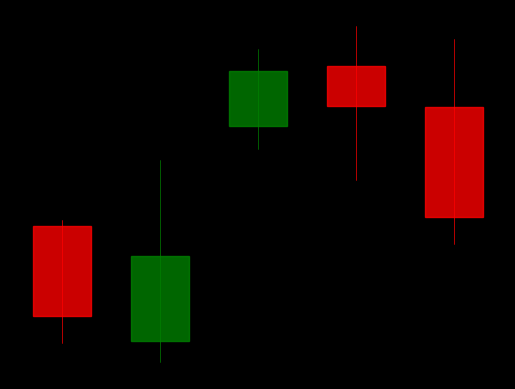

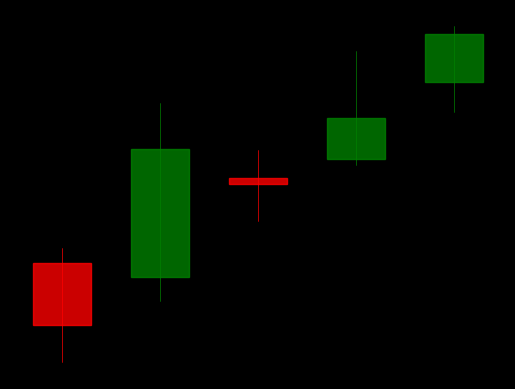

In [28]:
#name = '2015-'
signal_test_list = []
images_created_test = 0
for x in sunday_test_list:
    from_date = x - timedelta(days=7)
    from_date1 = from_date.date()              # strip the time
    next_weekending = x + timedelta(days=7)    # Next sunday
    next_weekending1 = next_weekending.date()  # Strip the time
#    print(from_date1, x, next_weekending1)
#    print(from_date,x)
#    if x == datetime.strptime('2020-07-12' , '%Y-%m-%d'):
#        print(x)
#        print(data[from_date1:x].head())
#        print('Fri and monday below')

##  Create Signal - take prior week last date price and take next week 1st day price and compare
    week_close = data_test[from_date1:x].tail(1)['Close']
    #print(type(week_close))
    week_close_price = week_close[0]
    #print(week_close_price)
    nextday_close = data_test[x:next_weekending1].head(1)['Close']
    try:
        nextday_close_price = nextday_close[0]
    except:
        break
    #print(nextday_close)
    if nextday_close_price > week_close_price:
        signal = 1
    else:
        signal = 0
    signal_test_list.append(signal)
    #print('Signal = ', signal)
    x1 = x.date()
    #print(from_date1, x1)
    ohlc = data_test[from_date1: x1]
    ohlc.reset_index(inplace=True)
    ohlc['Date'] = pd.to_datetime(ohlc['Date'])
    ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
    ohlc = ohlc.astype(float)
#    print(ohlc.head())
    # Creating Subplots
    fig, ax = plt.subplots()
    plt.axis('off')
    fig.patch.set_facecolor('black')

    candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)
    images_created_test = images_created_test + 1
    if signal == 1:
        plt.savefig(f'candlesticks_test/buy/{x1}.png')
    elif signal == 0:
        plt.savefig(f'candlesticks_test/sell/{x1}.png')

In [29]:
print('Test images created = ', images_created_test)

Test images created =  2


In [30]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-07-01,136.600006,137.330002,135.759995,137.270004,137.064651,52485800
2021-07-02,137.899994,140.000000,137.750000,139.960007,139.750626,78852600
2021-07-06,140.070007,143.149994,140.070007,142.020004,141.807541,108181800
2021-07-07,143.539993,144.889999,142.660004,144.570007,144.353729,104911600
2021-07-08,141.580002,144.059998,140.669998,143.240005,143.025711,105575500


In [31]:
train_len = len(signal_list)

In [32]:
train_len

52

In [33]:
len(sunday_list)

53

##### Create a dataframe for the training signals

In [34]:
signal_df = pd.DataFrame()
signal_df['Signal'] = signal_list
signal_df['Date'] = sunday_list[0:train_len]
signal_df.set_index('Date', inplace=True)
signal_df.head()

,Signal
Date,
2020-07-12,0
2020-07-19,1
2020-07-26,1
2020-08-02,1
2020-08-09,1


In [35]:
signal_df.to_csv('signal.csv', index=True)

In [36]:
test_len = len(signal_test_list)

In [37]:
test_len

2

In [38]:
sunday_test_list

[Timestamp('2021-07-18 00:00:00'),
 Timestamp('2021-07-25 00:00:00'),
 Timestamp('2021-08-01 00:00:00')]

##### Create a dataframe for the testing signals

In [39]:
signal_test_df = pd.DataFrame()
signal_test_df['Signal'] = signal_test_list
signal_test_df['Date'] = sunday_test_list[0:test_len]
signal_test_df.set_index('Date', inplace=True)
signal_test_df.head()

,Signal
Date,
2021-07-18,0
2021-07-25,1


In [40]:
signal_test_df.to_csv('signal_test.csv', index=True)

In [41]:
# # from mpl_finance import candlestick_ohlc
# # fig, ax = plt.subplots()
# # plt.axis('off')
# # fig.patch.set_facecolor('black')

# name = '2015-'
# for x in range(10):
#     print(x)
#     y=x*5
#     print('iloc range: ', y, ' to ', y+5)
#     fname = name + str(x)
#     print(fname)
# #    mpf.axis('off')
#     mpf.plot(data.iloc[y:y+5],type='candle',savefig=f"{fname}.png")
    

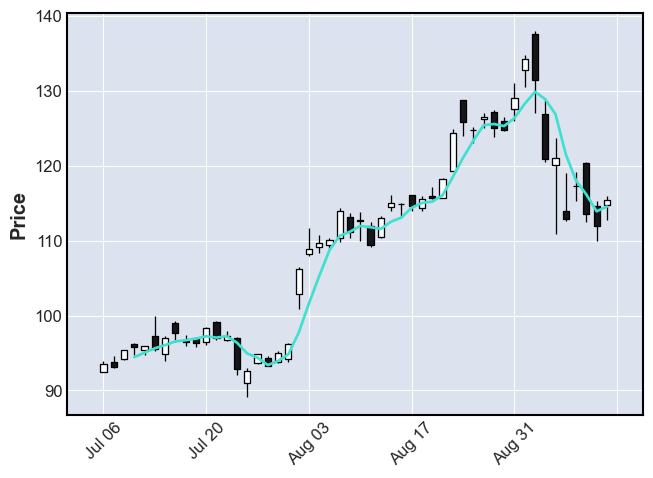

In [42]:
#slice with moving average
mpf.plot(data.iloc[0:50],type='candle',mav=4)

In [43]:
for wk in sunday_list:
    wk1 = wk.date()
    print(wk)

2020-07-12 00:00:00
2020-07-19 00:00:00
2020-07-26 00:00:00
2020-08-02 00:00:00
2020-08-09 00:00:00
2020-08-16 00:00:00
2020-08-23 00:00:00
2020-08-30 00:00:00
2020-09-06 00:00:00
2020-09-13 00:00:00
2020-09-20 00:00:00
2020-09-27 00:00:00
2020-10-04 00:00:00
2020-10-11 00:00:00
2020-10-18 00:00:00
2020-10-25 00:00:00
2020-11-01 00:00:00
2020-11-08 00:00:00
2020-11-15 00:00:00
2020-11-22 00:00:00
2020-11-29 00:00:00
2020-12-06 00:00:00
2020-12-13 00:00:00
2020-12-20 00:00:00
2020-12-27 00:00:00
2021-01-03 00:00:00
2021-01-10 00:00:00
2021-01-17 00:00:00
2021-01-24 00:00:00
2021-01-31 00:00:00
2021-02-07 00:00:00
2021-02-14 00:00:00
2021-02-21 00:00:00
2021-02-28 00:00:00
2021-03-07 00:00:00
2021-03-14 00:00:00
2021-03-21 00:00:00
2021-03-28 00:00:00
2021-04-04 00:00:00
2021-04-11 00:00:00
2021-04-18 00:00:00
2021-04-25 00:00:00
2021-05-02 00:00:00
2021-05-09 00:00:00
2021-05-16 00:00:00
2021-05-23 00:00:00
2021-05-30 00:00:00
2021-06-06 00:00:00
2021-06-13 00:00:00
2021-06-20 00:00:00


In [44]:
# cnt=1
# six_index=0
# week_max = 0
# for index, row in data.iterrows():
#     if index == pd.to_datetime('2015-07-01')  or index == pd.to_datetime('2015-07-02'):
#         continue
#     print('Date = ', index, ' Close and adj Close: ', row['Close'], ' Row count = ', cnt)
#     if week_max == 0:
#         week_max = row['Close']
#     else: 
#         if row['Close'] > week_max:
#             week_max = row['Close']
#     if cnt % 5 == 0:
#         print(' % 5 reached count = ', cnt, ' week_max = ', week_max)
#         day5_max = week_max
#         week_max = 0
#         print('day5 max = ', day5_max)
#         six_index= cnt+1
#     if cnt == six_index:
#         print(' % 6th day reached count = ', cnt, ' day5max = ', day5_max)
#         if row['Close'] > day5_max:
#             print(index, ' day 6 ', 'Signal = Buy , 6th day close = ', row['Close'], ' past 5 days max = ', day5_max)
#         else:
#             print(index, ' day 6 ', 'Signal = Sell , 6th day close = ', row['Close'], ' past 5 days max = ', day5_max)
#         #week_max = row['Close']
#     if cnt>12:
#         break
#     cnt=cnt+1
    